In [733]:
import fitz
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import os


In [755]:
text = 'hello'

print(text[4:])

o


In [734]:
ls

example_resume_1.pdf  Parse_resume_with_fitz.ipynb
example_resume_2.pdf  parse_resume_with_OCR/
example_resume_3.pdf  Parse_resume_with_PYtess.ipynb
mupdf/


In [735]:
path_to_pdf = 'example_resume_2.pdf' #путь до файла
#path_to_pdf = 'jpg2pdf.pdf'

In [736]:
fitz.open(path_to_pdf).pageCount

6

In [737]:
def get_page_from_pdf(path_to_pdf):
    '''Данная функция считывает PDF файл по указанному пути и 
        разбивает его на отдельные страницы
        input: путь
        return: список страниц, кол-во страниц'''
    list_image = []
    pdf = fitz.open(path_to_pdf)
    number_of_list = pdf.pageCount
    for page in pdf:
        pix = page.getPixmap(alpha = False, matrix=fitz.Matrix(300/100,300/100))
        mode = "RGBA" if pix.alpha else "RGB"
        img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)
        list_image.append(img)
    return list_image, number_of_list

In [738]:
# doc = fitz.open(path_to_pdf)
# page = doc.loadPage()
# type(page)

In [739]:
list_image,number_of_list = get_page_from_pdf(path_to_pdf)

In [740]:
list_image

[<PIL.Image.Image image mode=RGB size=1786x2526 at 0x7F99DF8BD550>,
 <PIL.Image.Image image mode=RGB size=1786x2526 at 0x7F99DF8BDCC0>,
 <PIL.Image.Image image mode=RGB size=1786x2526 at 0x7F99DF8BDAC8>,
 <PIL.Image.Image image mode=RGB size=1786x2526 at 0x7F99DF8BD828>,
 <PIL.Image.Image image mode=RGB size=1786x2526 at 0x7F99DFA434A8>,
 <PIL.Image.Image image mode=RGB size=1786x2526 at 0x7F99DFA43DA0>]

In [741]:
number_of_list

6

In [742]:
def conver_text_image(list_image):
    '''
    Функция принимает на вход список страниц и преобразует серый цвет
    шрифтов в чёрный для лучшего качества их распознавания.
    input:список страниц
    output: список конвертированных страниц
    '''
    convert_list_images = []
    
    for a in list_image:
        
        img = a.convert("RGBA")
        pixdata = img.load()
        for y in range(img.size[1]):
            for x in range(img.size[0]):
                if pixdata[x, y] != (255, 255, 255, 255):
                    pixdata[x, y] = (0, 0, 0, 255)
    
        convert_list_images.append(img)
        
    return convert_list_images

In [750]:
type(convert_list_images)

NameError: name 'convert_list_images' is not defined

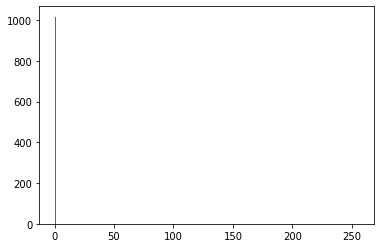

In [743]:
histogramm = img.histogram()

plt.hist(histogramm,256,[0,256]) 
plt.show()

In [744]:
# def find_target_page(image=img, search_header = None):
#     '''Функция осуществляет поиск страницы с необходимым словосочетанием'''
#     page_text = pytesseract.image_to_string(image, lang = 'rus').split('\n')
#     header = [i for i in page_text if search_header in i.lower()]
#     if header != []:
#         return header
#     else:
#         return error
    

In [745]:
type(list_image)

list

In [746]:
# def test_target_page(conver_text_image):
#     '''g'''
#     data_of_pdf = []
#     for x in conver_text_image:  
#         page_text = pytesseract.image_to_string(x, lang = 'rus').split('\n')
#         data_of_pdf.append(page_text)
#     return data_of_pdf

In [ ]:
test_target_page(conver_text_image(list_image))

In [748]:
def find_target_page(conver_text_image):
    '''g'''
    data_of_pdf = []
    for x in conver_text_image:  
        page_text = pytesseract.image_to_string(x, lang = 'rus').split('\n')
        search_text = ['родил', 'опыт работы', 'права']
        age = [i for i in page_text if search_text[0] in i.lower()]
        if age != []:
            data_of_pdf.append(age)
        
        skil_of_job = [i for i in page_text if search_text[1] in i.lower()]
        if skil_of_job != []:
            data_of_pdf.append(skil_of_job)
          
        have_a_car = [i for i in page_text if search_text[2] in i.lower()]    
        if have_a_car != []:
            data_of_pdf.append(['Есть водительские права'])
       
    return data_of_pdf
    

In [749]:
find_target_page(conver_text_image(list_image))

[['Мужчина, 45 лет, родился 21 марта 1974'],
 ['Опыт работы — 20 лет 7 месяцев'],
 ['Есть водительские права']]

In [574]:
re.findall(r'\d+', stroka[0][0])

['27', '9', '1992']

In [593]:
re.findall(r'\d+', stroka[1][0])

['2', '6']

In [598]:
def data_convertation(data_of_pdf):
    age_of_candidate = ('возраст - '+(re.findall(r'\d+', stroka[0][0]))[0] + ' лет')
    skil_of_job = ('опыт работы - ' +(re.findall(r'\d+', stroka[1][0]))[0]+'.'+ (re.findall(r'\d+', stroka[1][0]))[1] + ' лет')
    if data_of_pdf[2] != []:
        have_auto = 
    return age_of_candidate, skil_of_job

In [599]:
data_convertation(data_of_pdf)

('возраст - 27 лет', 'опыт работы - 2.6 лет')

In [405]:
for x in list_image:  
    page_text = pytesseract.image_to_string(img, lang = 'rus').split('\n')
    
    search_text = ['лет', 'опыт работы', 'автомобиль']
    age = [i for i in page_text if search_text[0] in i.lower()]
    skil_of_job = [i for i in page_text if search_text[1] in i.lower()]
    have_a_car = [i for i in page_text if search_text[2] in i.lower()]

In [419]:
find_target_page(convert_list_images)

NameError: name 'convert_list_images' is not defined

In [318]:
page_text = pytesseract.image_to_string(img, lang = 'rus').split('\n')

In [319]:
search_text = ['лет', 'опыт работы', 'автомобиль']

In [320]:
[i for i in page_text if search_text[0] in i.lower()]

['Мужчина, 27 лет, родился 9 июня 1992']

In [298]:
# for i in page_text:
#     if i.lower() == search_text[0]:
#         print (i)
#         i+=1
#     else:
#         print([])
    
#   #  if  in i.lower()

In [280]:
pytesseract.image_to_string(img, lang = 'rus').split('\n')

['Рупоп 3 Тщопа! соигзе',
 'Введение в Ва З‹епсе и машинное обучение',
 '',
 'Основы СИ',
 '2019 Основы статистики',
 '2018 ЗОЕ Рипдатета! соигзе',
 '2016 Программирование на РуНоп',
 '',
 'Ключевые навыки',
 '',
 'Знание языков Русский — Родной',
 'Английский — В2 — Средне-продвинутый',
 'Немецкий — А1 — Начальный',
 '',
 ' ',
 '',
 'Навыки',
 '',
 'Опыт вождения',
 '',
 'Имеется собственный автомобиль',
 'Права категории В, С, В',
 '',
 'Дополнительная информация',
 '',
 'Обо мне Имею ряд научных статей, входящих в базы Эсориз и ВАК, среди них:',
 '- Тве спосе ое рипсре о ипсбопта ое зузет оЁЕ тадпеНс |еуцаНоп юг Пе демсе о!',
 'Вюп-рейогтапсе {ез пд о! ромдег рептапег! тадпе',
 '- Оемеюртег( апа гезеагсй оГабоит Юг а@егтйоа Пе ВН сигуе изтд а эпае ритагу теазийпа',
 'сопуепег Базед оп Ме те#под оГ/!-сае то4е!{е5{5',
 '- Апауз6 апа зуптез!$ ог або ит$ оЁ зоМпо шуегзе ргоШетз Бу пе#под$ о! с!аззса! ап Модет',
 'ашщотайс сотто! Чнеогу',
 '- Анализ влияния критических дефектов магнитной

In [262]:
find_target_page(img, 'автомобиль')

['Имеется собственный автомобиль']

In [157]:
# def get_info(page_text, search_object = None):
#     prepare_text = [i for i in page_text if i not in ['', ' ']]
#     search_needed_row = [i for i in prepare_text if search_object in i.lower()][0]
#     object_index = prepare_text.index(search_needed_row) + 1
#     needed_object = prepare_text[object_index]
    
#     return needed_object

In [160]:
for image in list_image:
    page_text = find_target_page(image, search_header = 'анкета участника конференции')
   
    if page_text != []:
        op = get_info(page_text, search_object = 'шифр конференции')
        #top = get_info(page_text, search_object = 'место учебы или работы')
        break
    else:
        print ('error')
#print('ФИО: {0}'.format(op))
#print('Тема: {0}'.format(top))

error
error


In [71]:
image_to_data #

NameError: name 'image_to_data' is not defined

In [25]:
pdffile = path_to_pdf
doc = fitz.open(pdffile)
page = doc.loadPage(0) #number of page
pix = page.getPixmap()
output = "outfile.png"
pix.writePNG(output)